# End to End Machine Learning with Deployment

### Part1- EDA of Medical Dataset 
1. Import the libraries
2. Load the data and view it
3. Clean the data 
4. Perform EDA 

### Part2- Modelling of Dataset 
5. Preprocessing
6. Fitting and Evaluation
7. Optimization
8. Interpretation
9. Model Deploytment

In [65]:
!pip install xgboost --quiet

In [66]:
!pip install streamlit --quiet


In [67]:
!pip install imbalanced-learn --quiet

In [68]:
!pip install xgboost --quiet

### Step1: Import the libraries


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

# libraries for preprocessing 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# libraries for model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

print("All libraries are imported")

All libraries are imported


### Step2:Load the data and view it

In [70]:
data=pd.read_csv("data.csv")
data.head(10)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,1,85,66,29,0,26.6,0.351,31,No
2,2,8,183,64,0,0,23.3,0.672,32,Yes
3,3,1,89,66,23,94,28.1,0.167,21,No
4,4,0,137,40,35,168,43.1,2.288,33,Yes
5,5,5,116,74,0,0,25.6,0.201,30,No
6,6,3,78,50,32,88,31.0,0.248,26,Yes
7,7,10,115,0,0,0,35.3,0.134,29,No
8,8,2,197,70,45,543,30.5,0.158,53,Yes
9,9,8,125,96,0,0,0.0,0.232,54,Yes


In [71]:
data.shape

(768, 10)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [73]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,768.0,383.500000,221.846794,0.000,191.75000,383.5000,575.25000,767.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [74]:
data[~data.applymap(np.isreal).any(1)]

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Observations**
1. The dataset has 768 rows and 10 columns
2. The column 'Unnamed: 0' is redundant
3. There are no nulls 
4. However there are 0's present as null which we have to take care of
5. There are no corrupt characters

### Step3: Clean the data 

In [75]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [76]:
zerofiller=lambda x:x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, 0)

In [77]:
# encode the categorical outcome variable
df=data.copy()
d={"Yes":1, 'No':0}
df['Outcome']=df['Outcome'].map(d)

In [78]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0


### Step4: Perform EDA 
1. Univariates- NUmerical
2. UNivariates- Categorical
3. BUvariate - Categorical vs Numerical
4. Bivariate - Numerical vs Numerical 
5. MUltivaraite Pairplot
6. Correlations and Heatmpap
7. Outcome is a binary categorical variable


In [79]:
def histograms(df):
    df.hist()
    plt.tight_layout()
    plt.show()

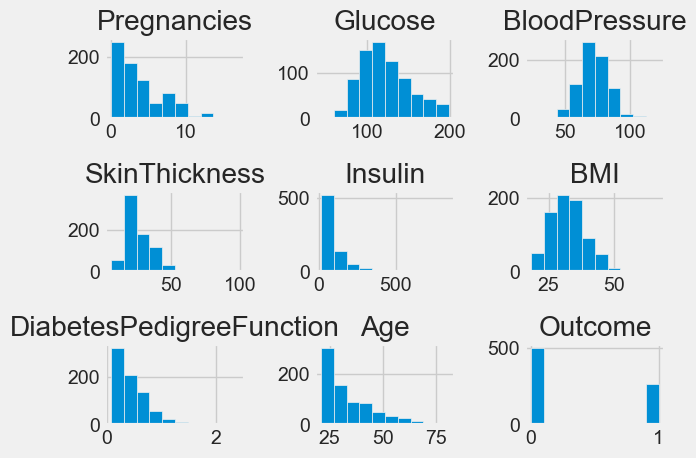

In [80]:
histograms(df)

In [81]:
def barplot(data, feature):
    print("Bar plot of the variable ", feature)
    plt.figure(figsize=(10,7))
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
    plt.show()

Bar plot of the variable  Outcome


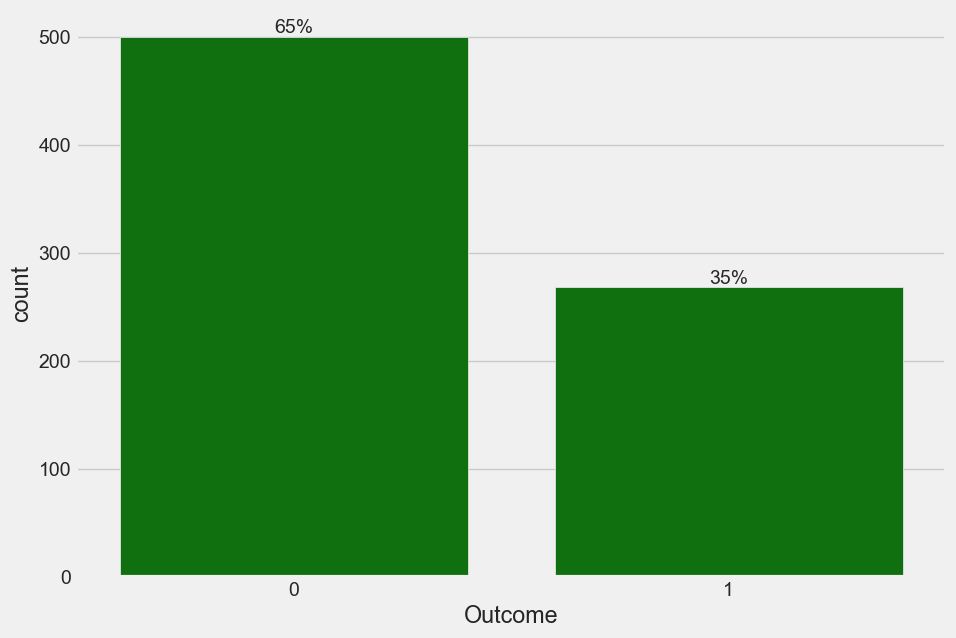

In [82]:
barplot(df, 'Outcome')

In [83]:
def boxplot_histplot(data, feature, bins=None, figsize=(12,7)):
    print('Boxplot and Histplot for ', feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw = {"height_ratios":(0.25, 0.75)},
    figsize=figsize
    )
    sns.boxplot(data=data, x=feature, color='violet', ax=ax_box, showmeans=True)
    sns.histplotplot(data=data, x=feature, ax=ax_hist, bins=bins)   if bins else sns.histplot(data\
                            =data, x=feature, ax=ax_hist)  
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')
    plt.show()
    

Boxplot and Histplot for  Pregnancies


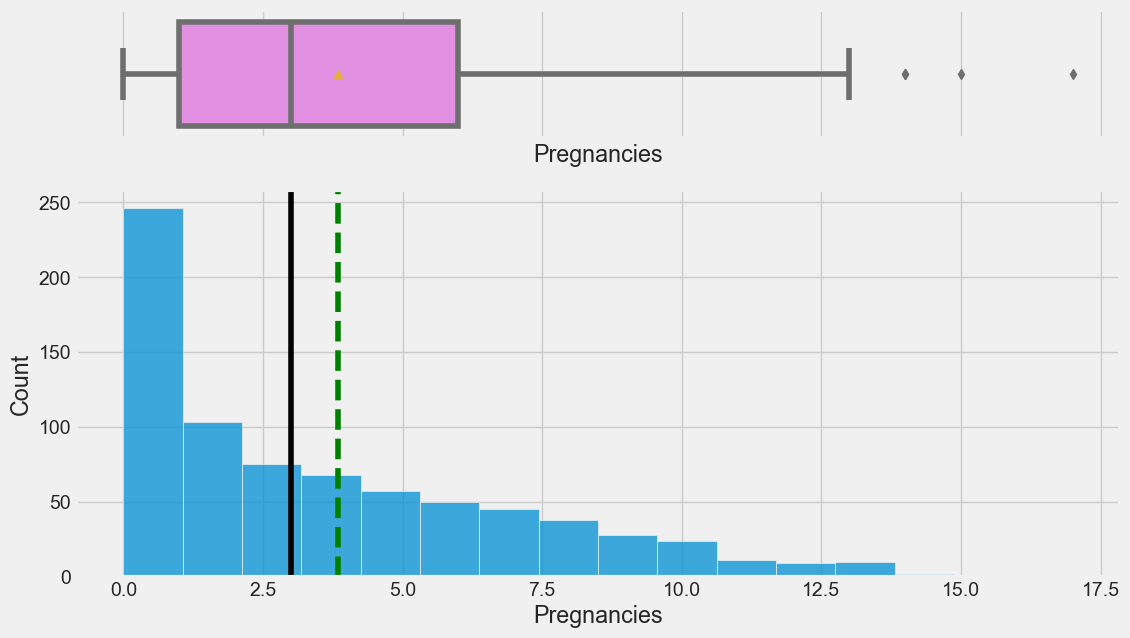

Boxplot and Histplot for  Glucose


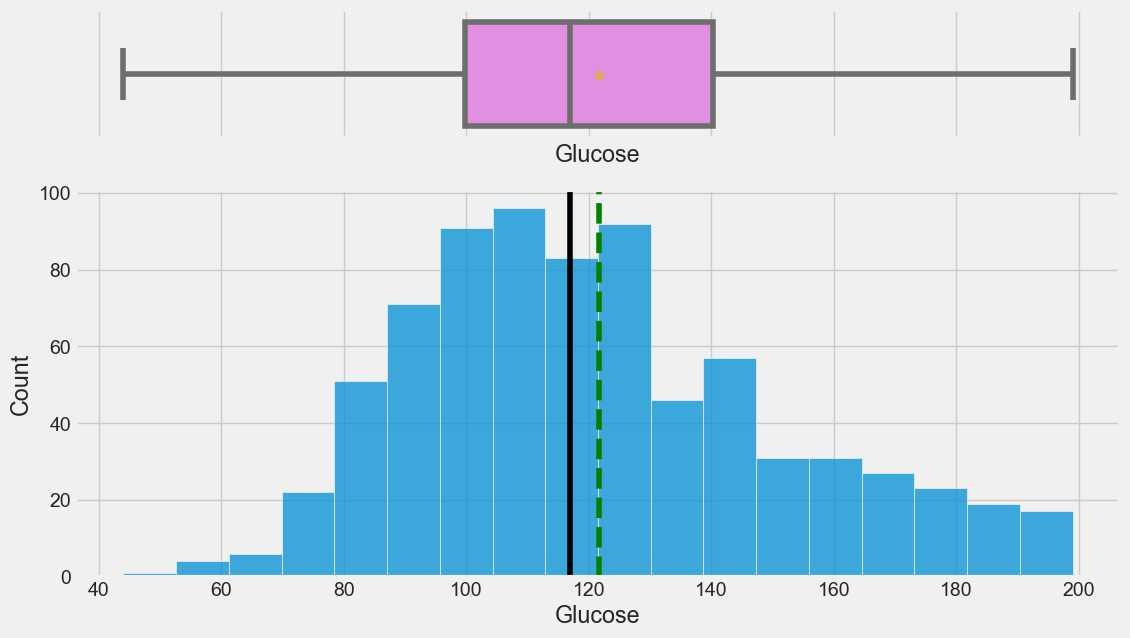

Boxplot and Histplot for  BloodPressure


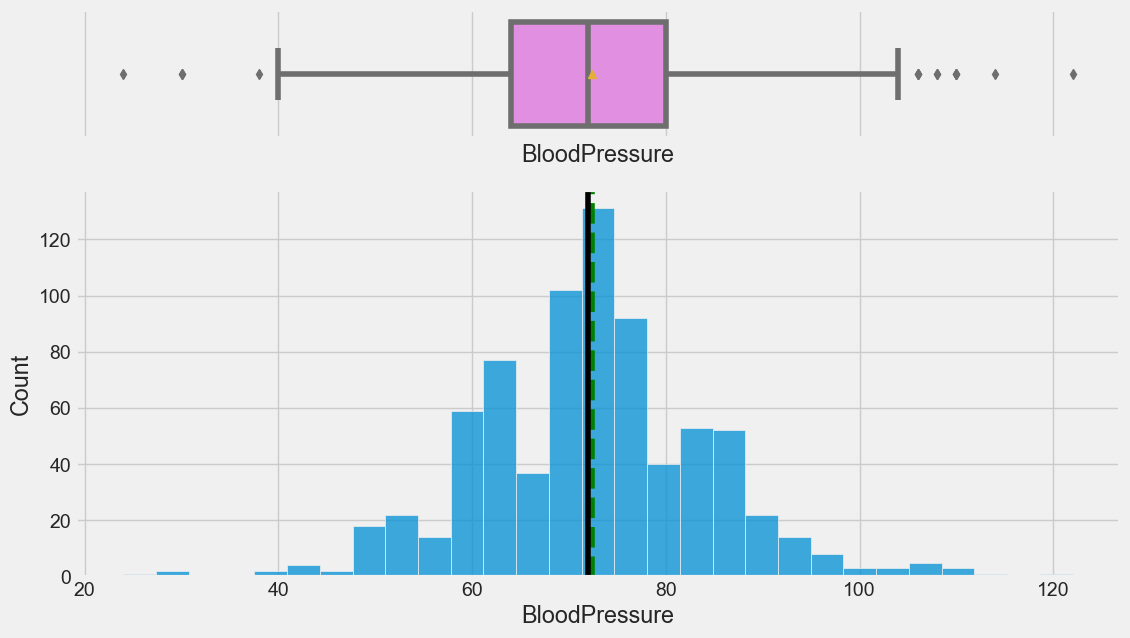

Boxplot and Histplot for  SkinThickness


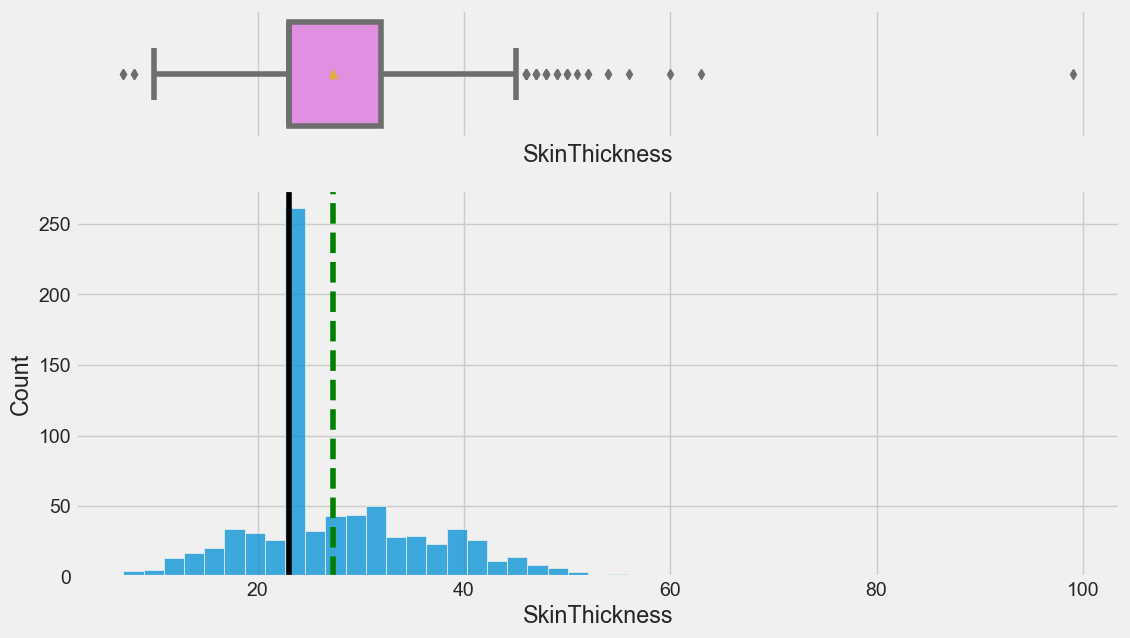

Boxplot and Histplot for  Insulin


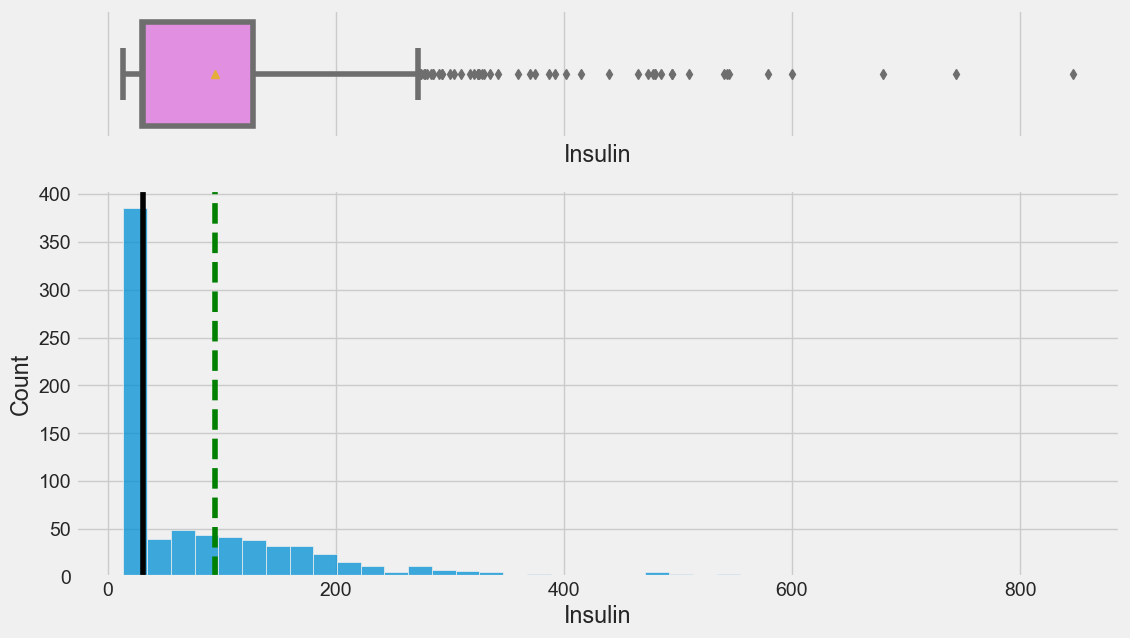

Boxplot and Histplot for  BMI


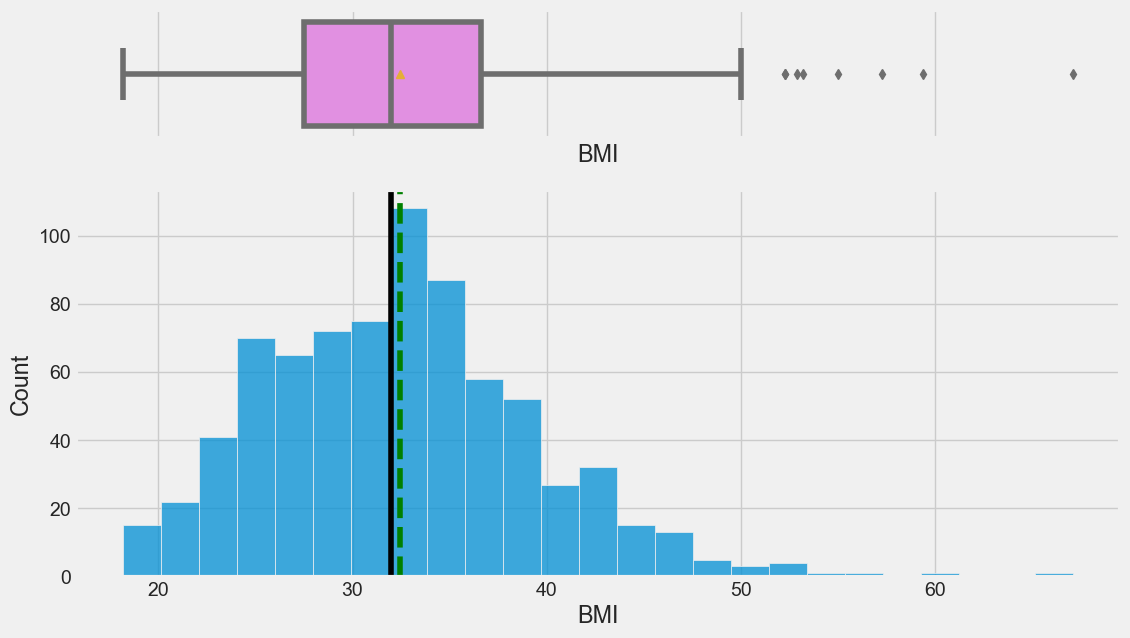

Boxplot and Histplot for  DiabetesPedigreeFunction


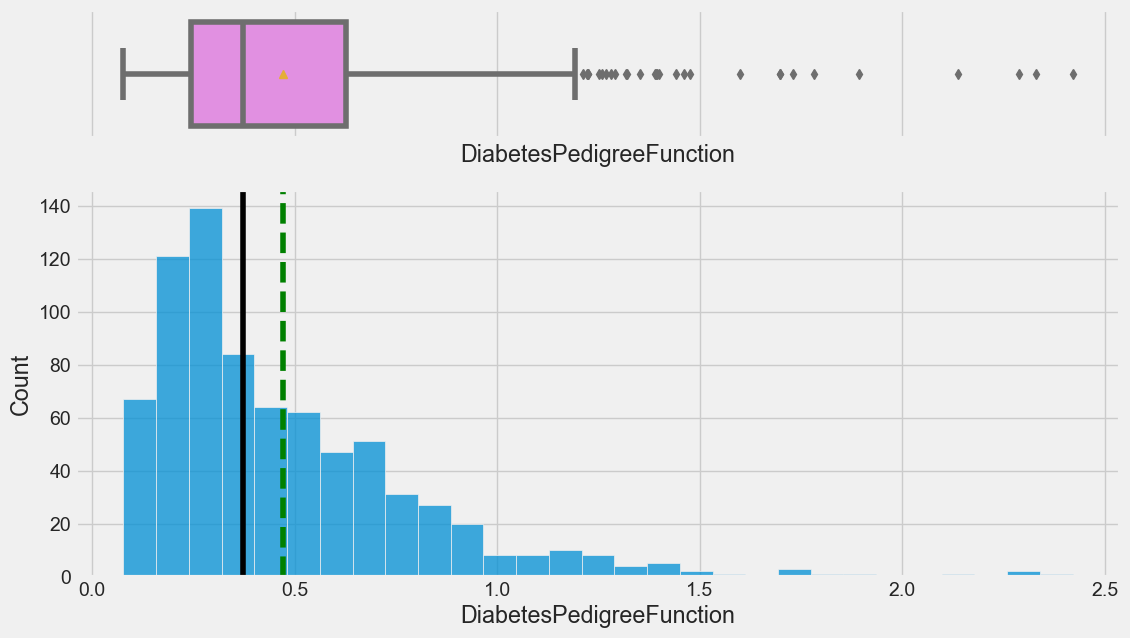

Boxplot and Histplot for  Age


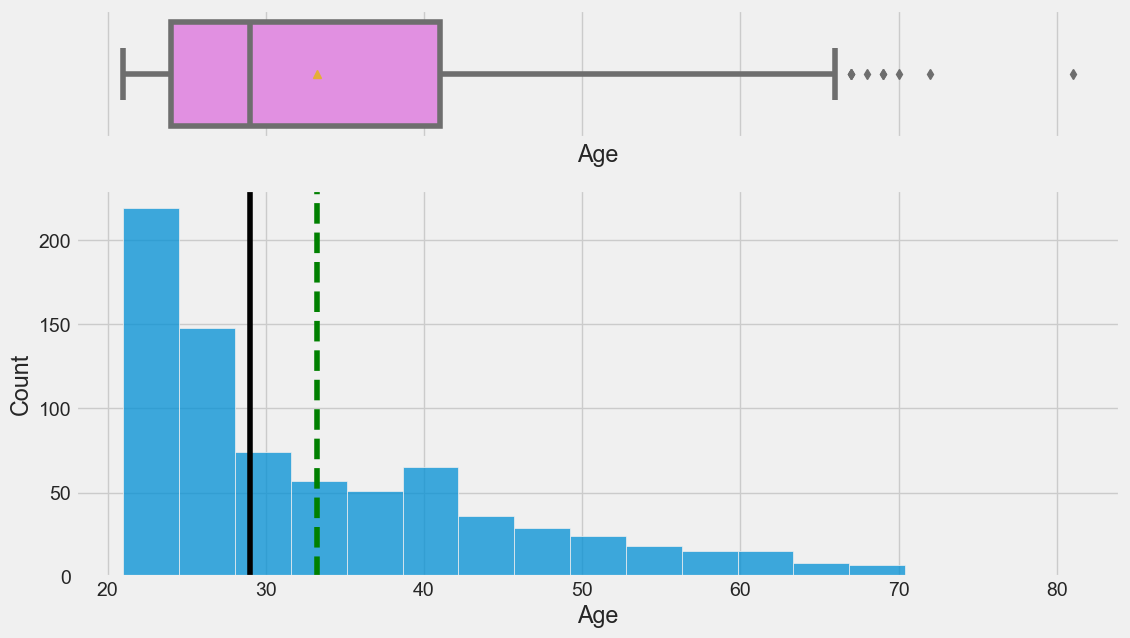

Boxplot and Histplot for  Outcome


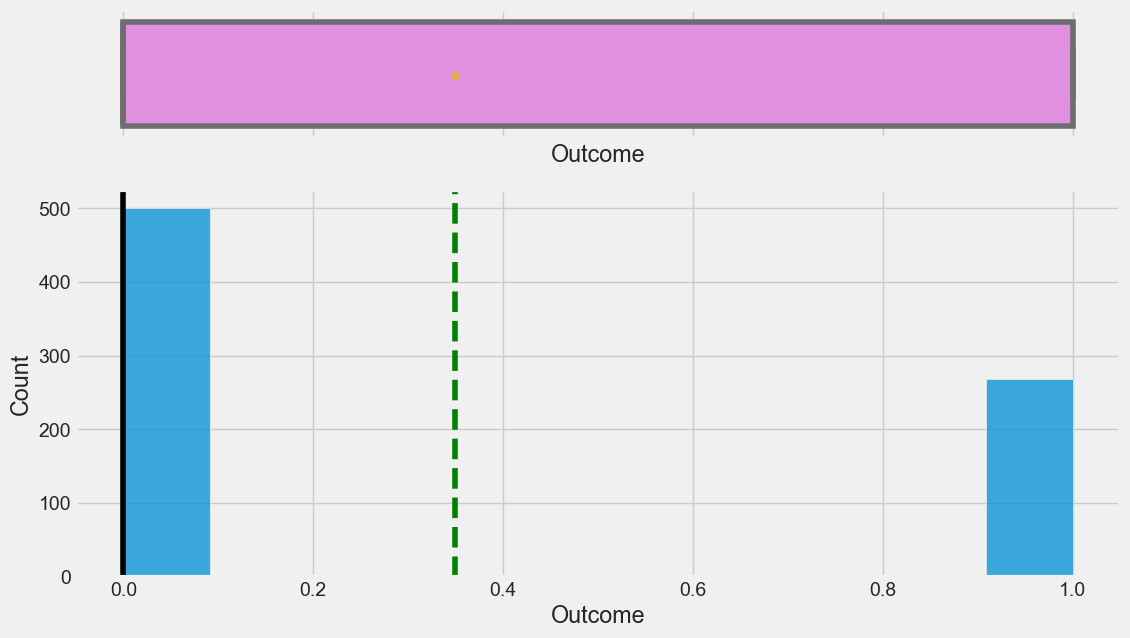

In [84]:
for col in df.select_dtypes(exclude='O').columns:
    boxplot_histplot(df, col)

**Observations**
1. We see that Pregnancies, Insulin, Dpf and Age are huighly right skewed
2. Wee see that Outcome is highly imbalanced
3. We see that skin thickness, insulin and Dpf have very high amount of outliers 

**Bivariate Analysis**

In [85]:
def catnum(data, feature1, feature2):
    print("The Bivariate barchart between {0} and {1}".format(feature1, feature2))
    data.groupby(feature1)[feature2].mean().plot(kind='bar', color='orange')
    plt.show()

The Bivariate barchart between Outcome and Pregnancies


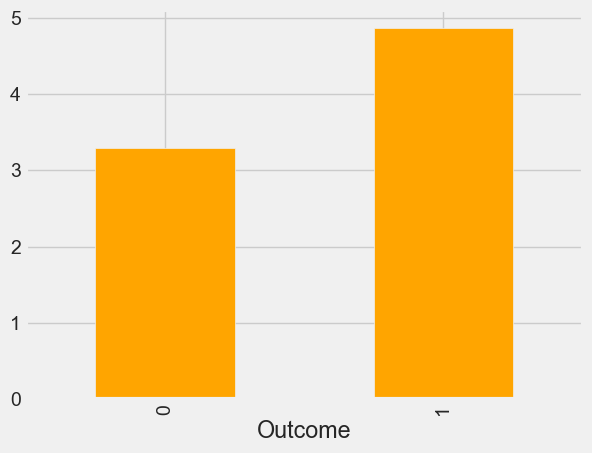

The Bivariate barchart between Outcome and Glucose


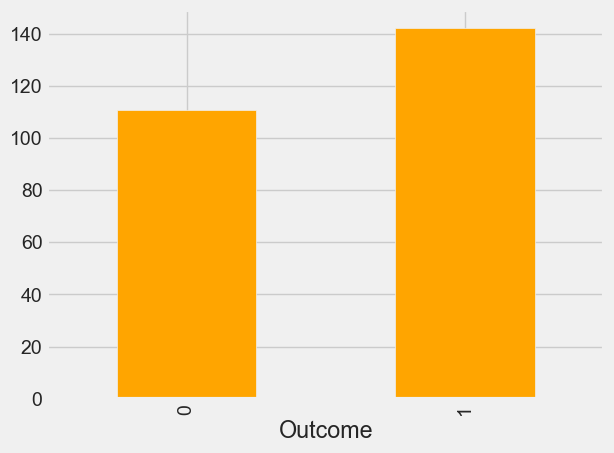

The Bivariate barchart between Outcome and BloodPressure


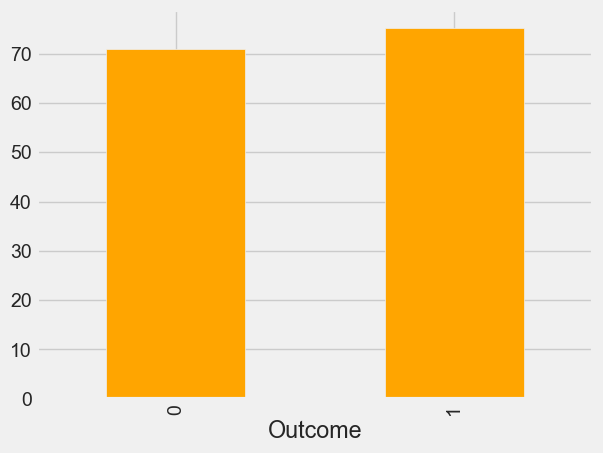

The Bivariate barchart between Outcome and SkinThickness


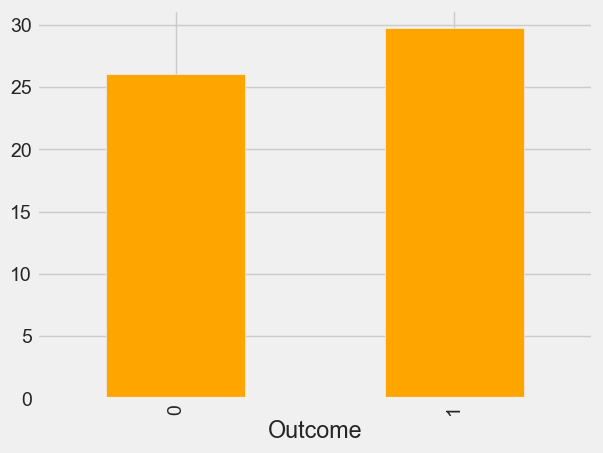

The Bivariate barchart between Outcome and Insulin


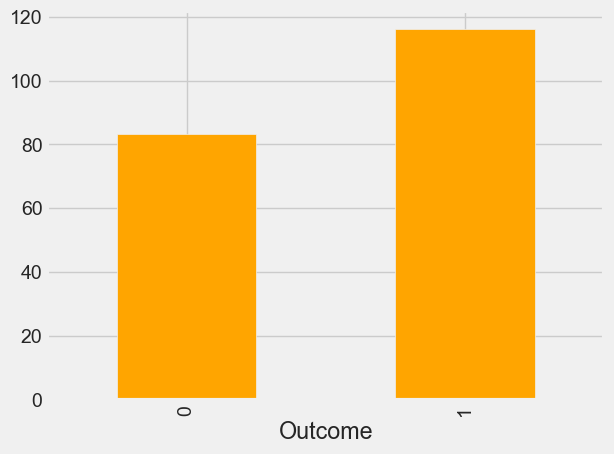

The Bivariate barchart between Outcome and BMI


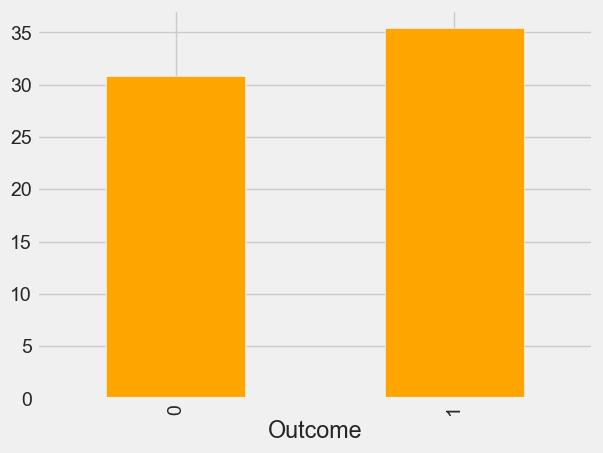

The Bivariate barchart between Outcome and DiabetesPedigreeFunction


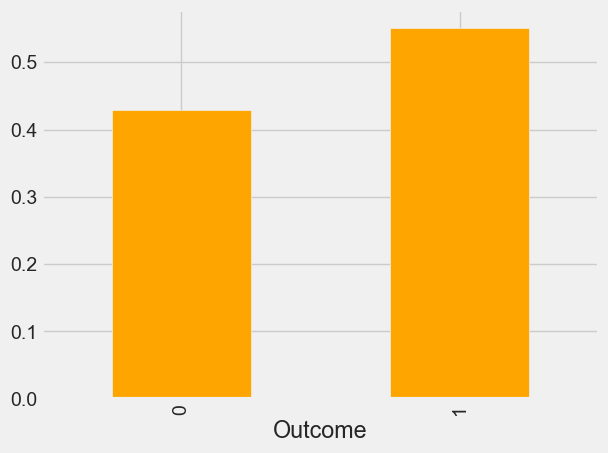

The Bivariate barchart between Outcome and Age


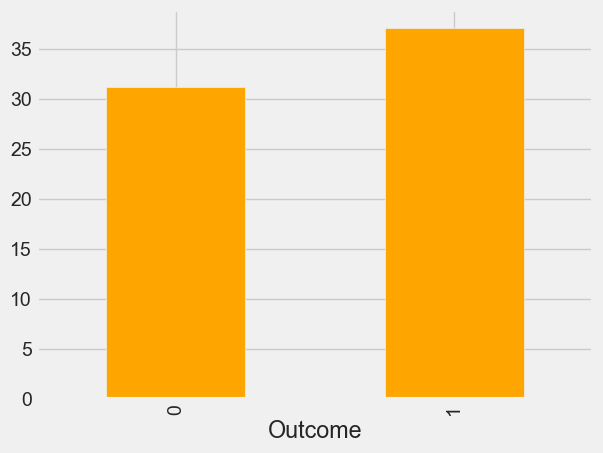

The Bivariate barchart between Outcome and Outcome


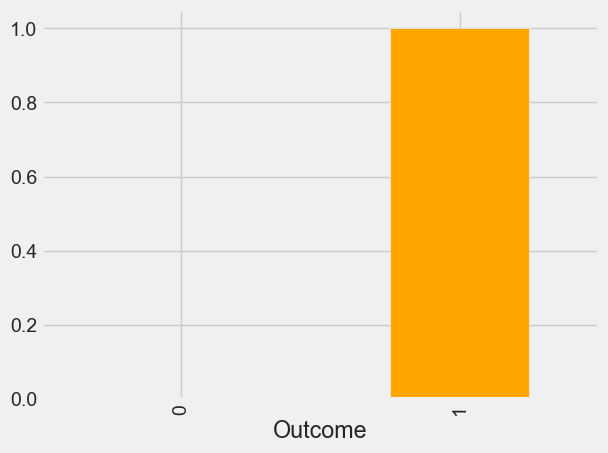

In [86]:
for col in df.select_dtypes(exclude='O').columns:
    catnum(df,'Outcome' ,col)

**Observation**
The graphs show that women with higher no.of pregnancies, hiugher glucose level, higher insulin level , higher dpf and age are more likely tobe diabetic |

In [87]:
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    print("Bivariates between {0} and {1}".format(feature1, feature2))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color='green')
    plt.title('Lineplot')
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color='blue')
    plt.title('Scatterplot')
    plt.show()
    

Bivariates between Age and Pregnancies


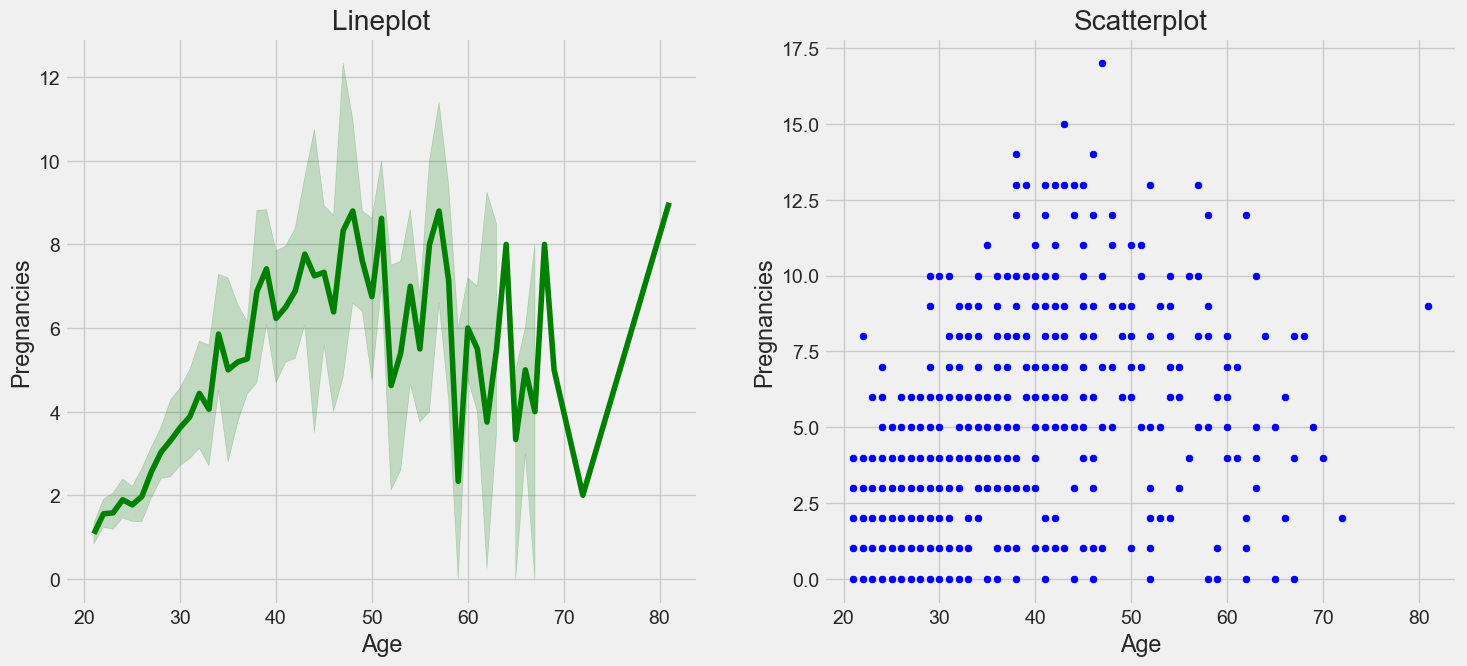

Bivariates between Age and Glucose


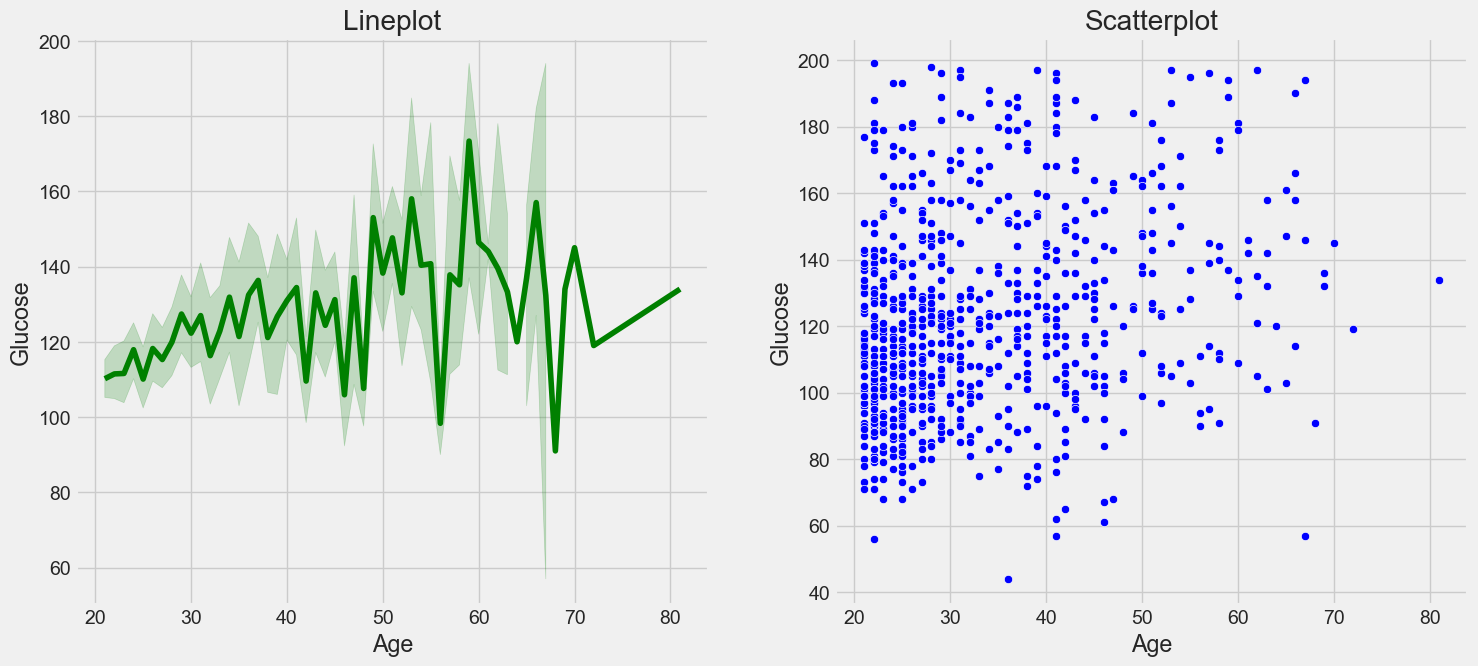

Bivariates between Age and BloodPressure


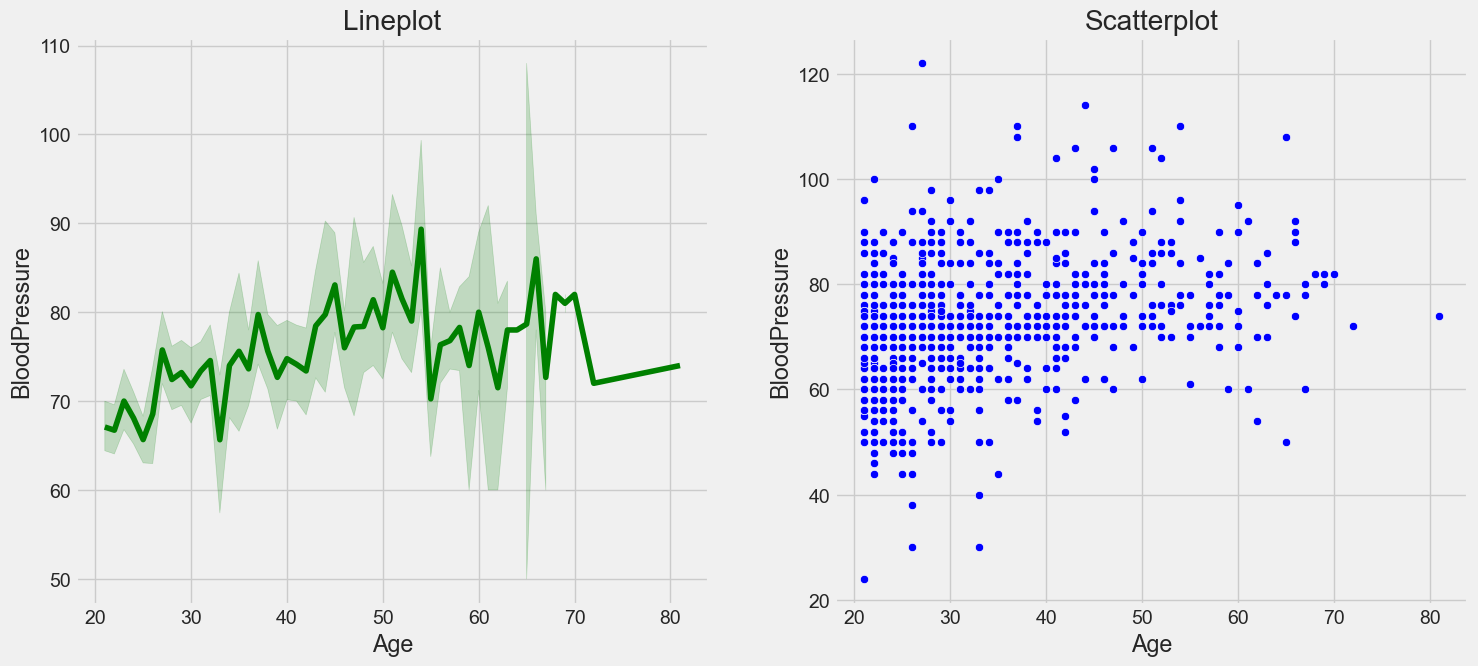

Bivariates between Age and SkinThickness


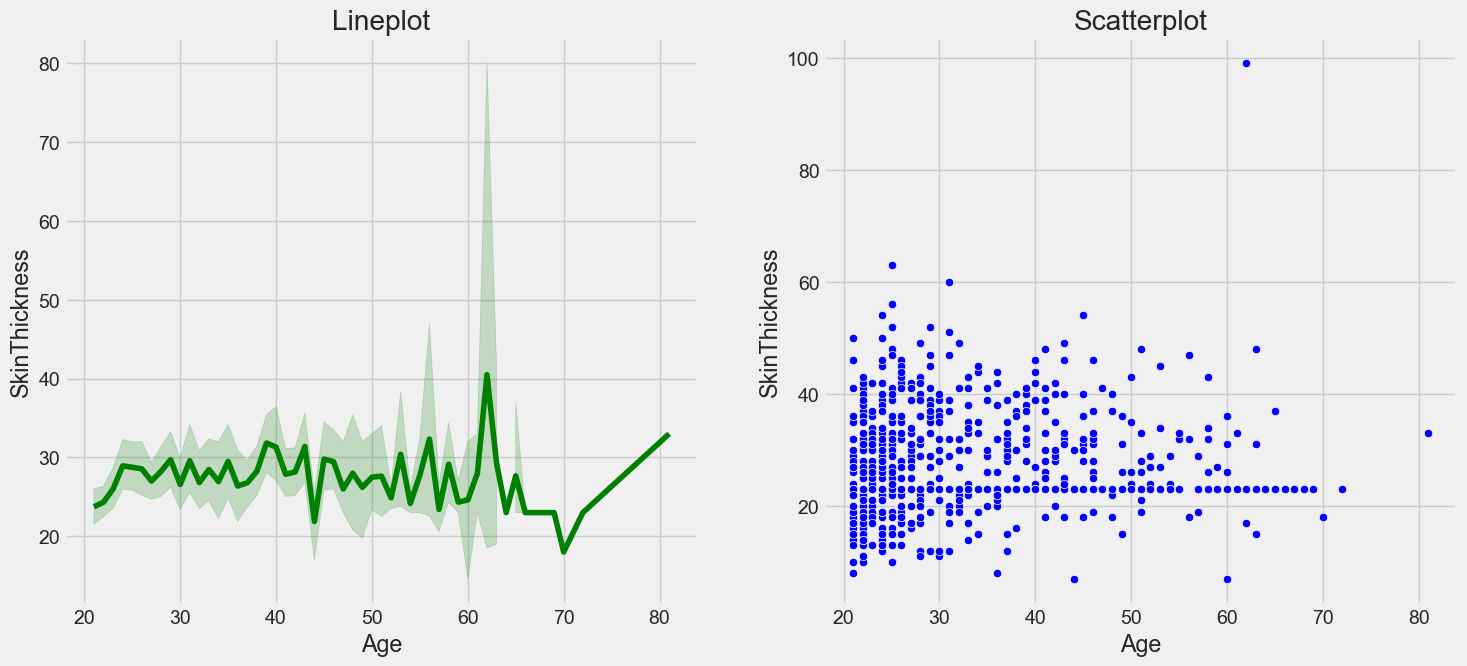

Bivariates between Age and Insulin


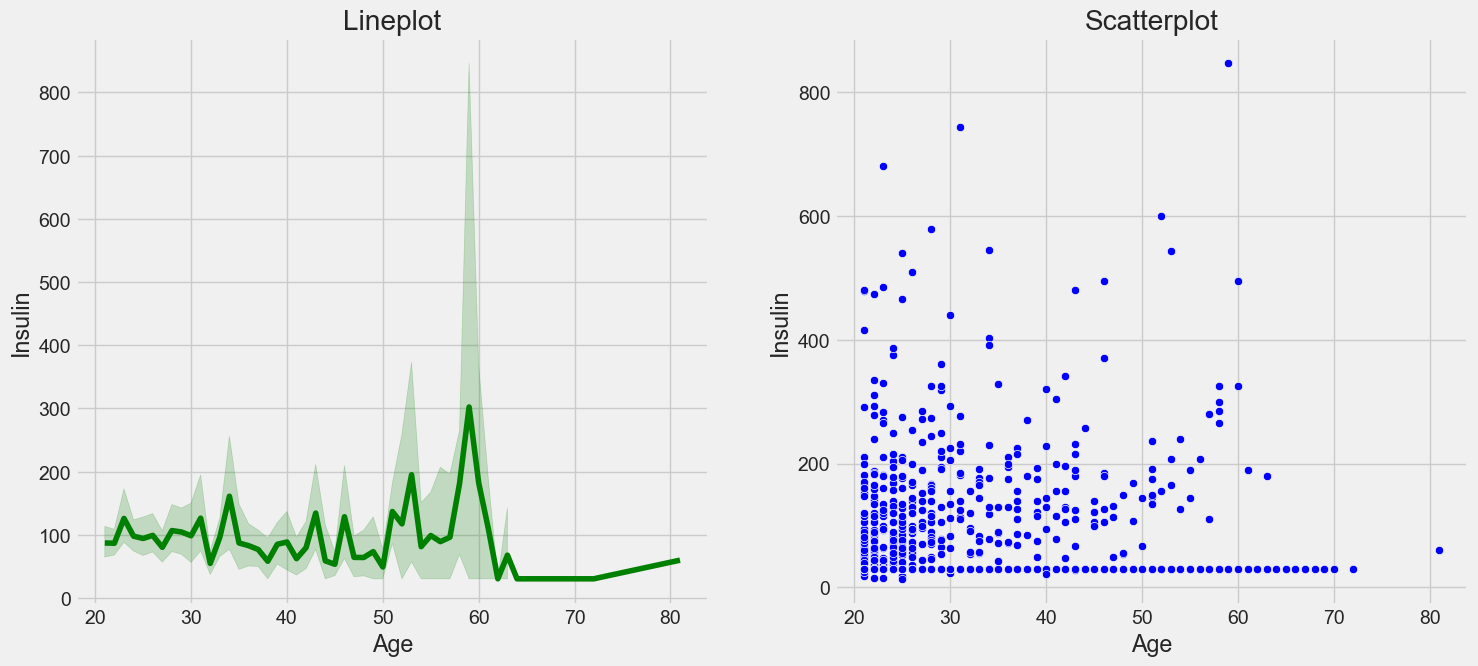

Bivariates between Age and BMI


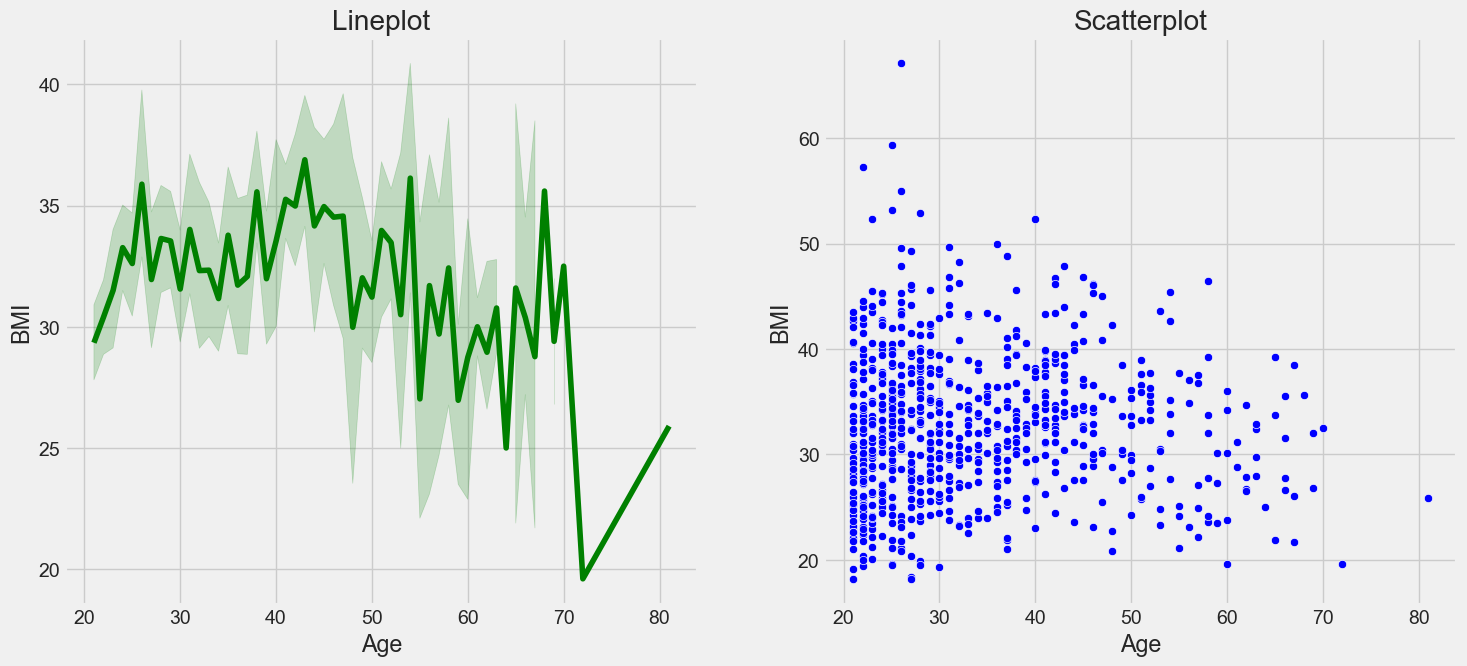

Bivariates between Age and DiabetesPedigreeFunction


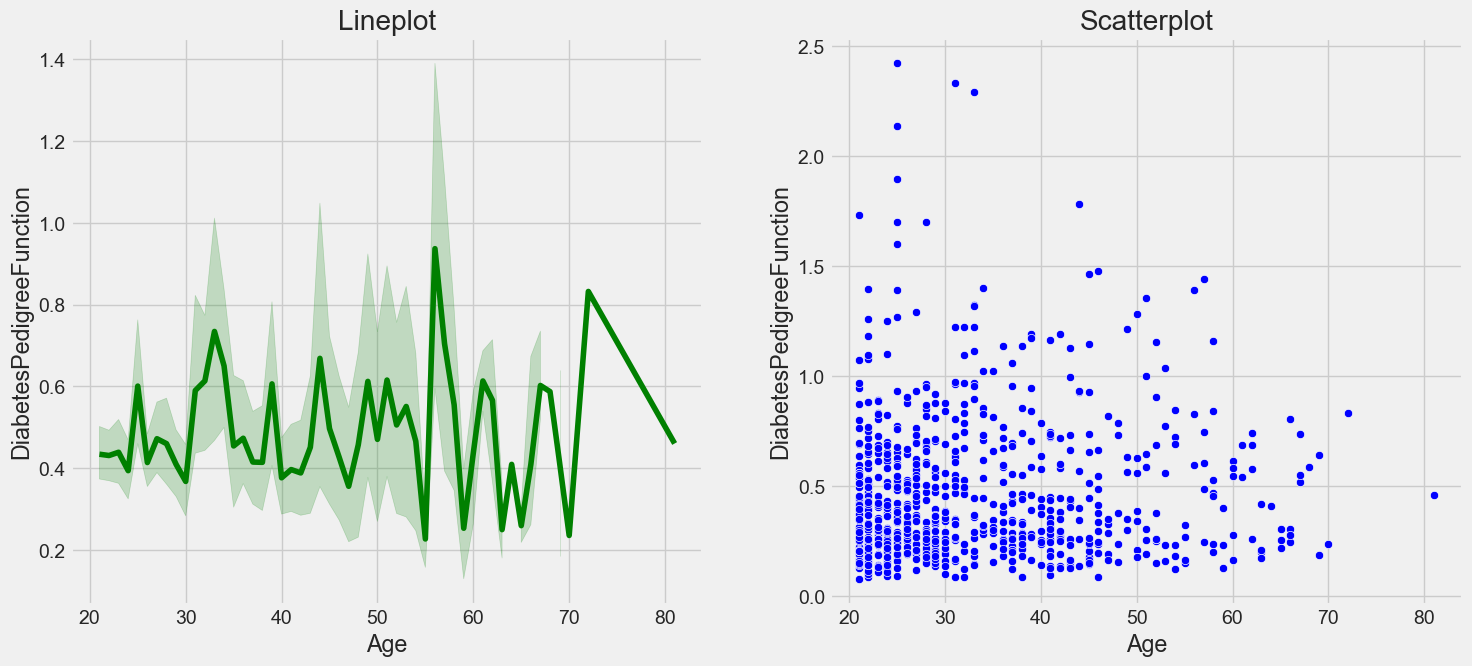

Bivariates between Age and Age


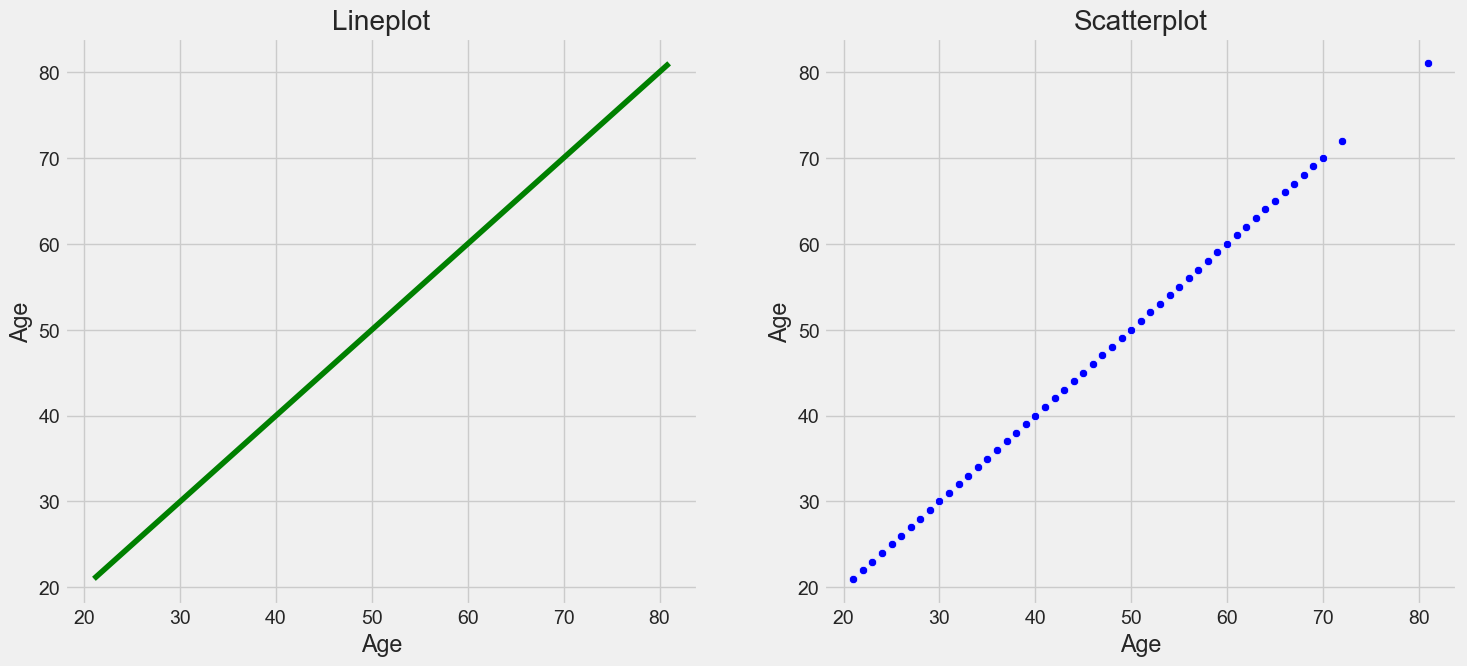

Bivariates between Age and Outcome


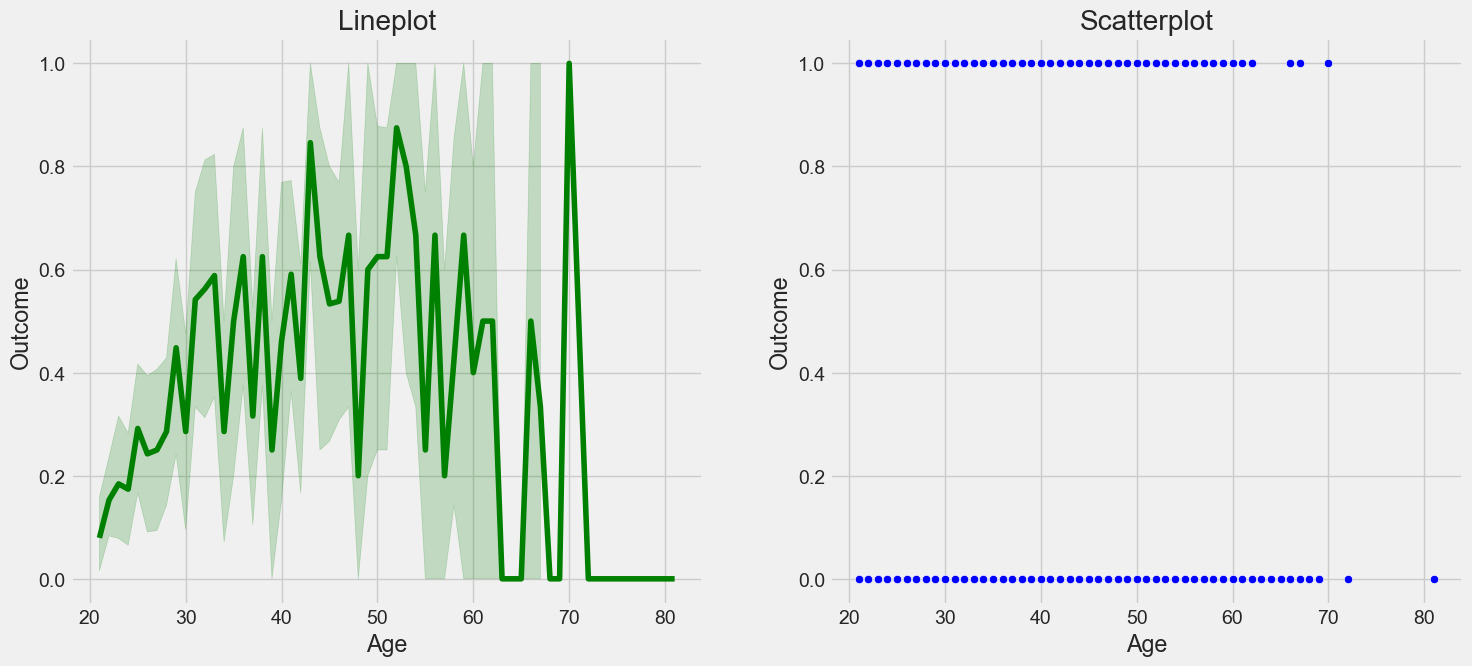

In [88]:
for col in df.select_dtypes(exclude='O').columns:
    lineplot_scatterplot(data=df,feature1='Age', feature2=col)
    

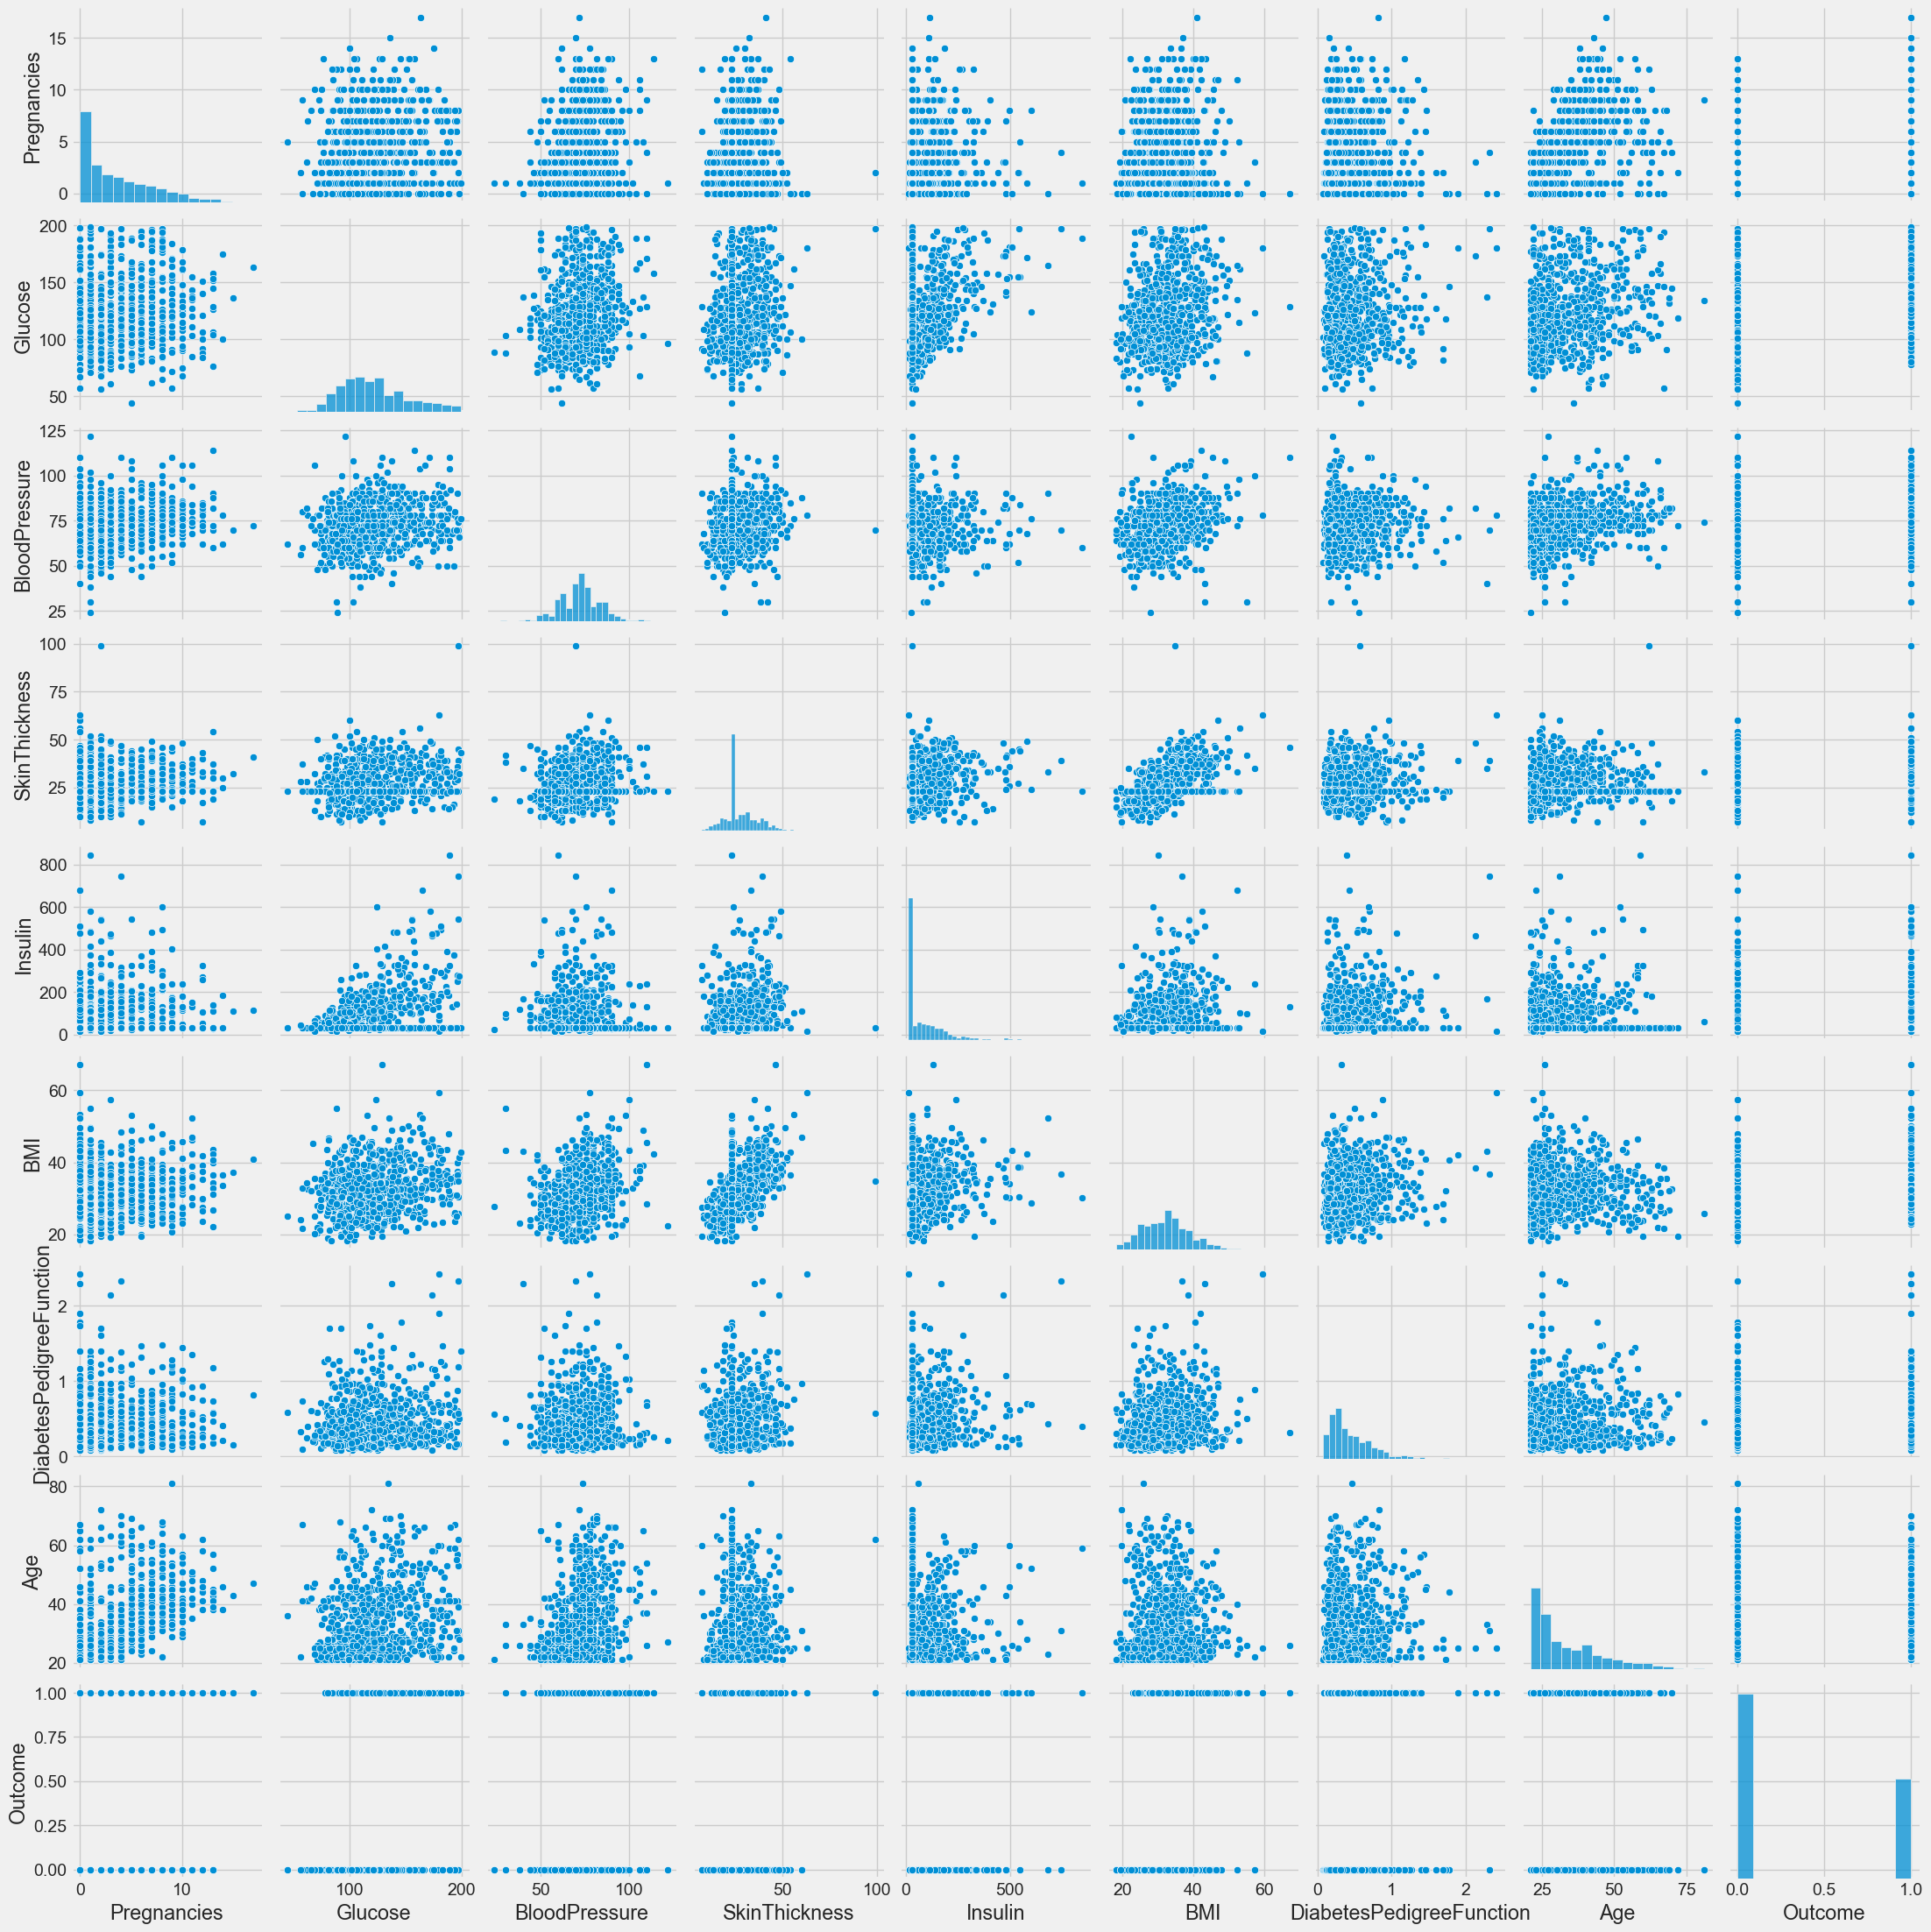

In [89]:
sns.pairplot(df)

**Observations**
There appears multicollinearity between Glucose and Insulin, BMI and skin thickness

In [90]:
# Lets look at variables most correlated with Outcome 
df[df.columns[:]].corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

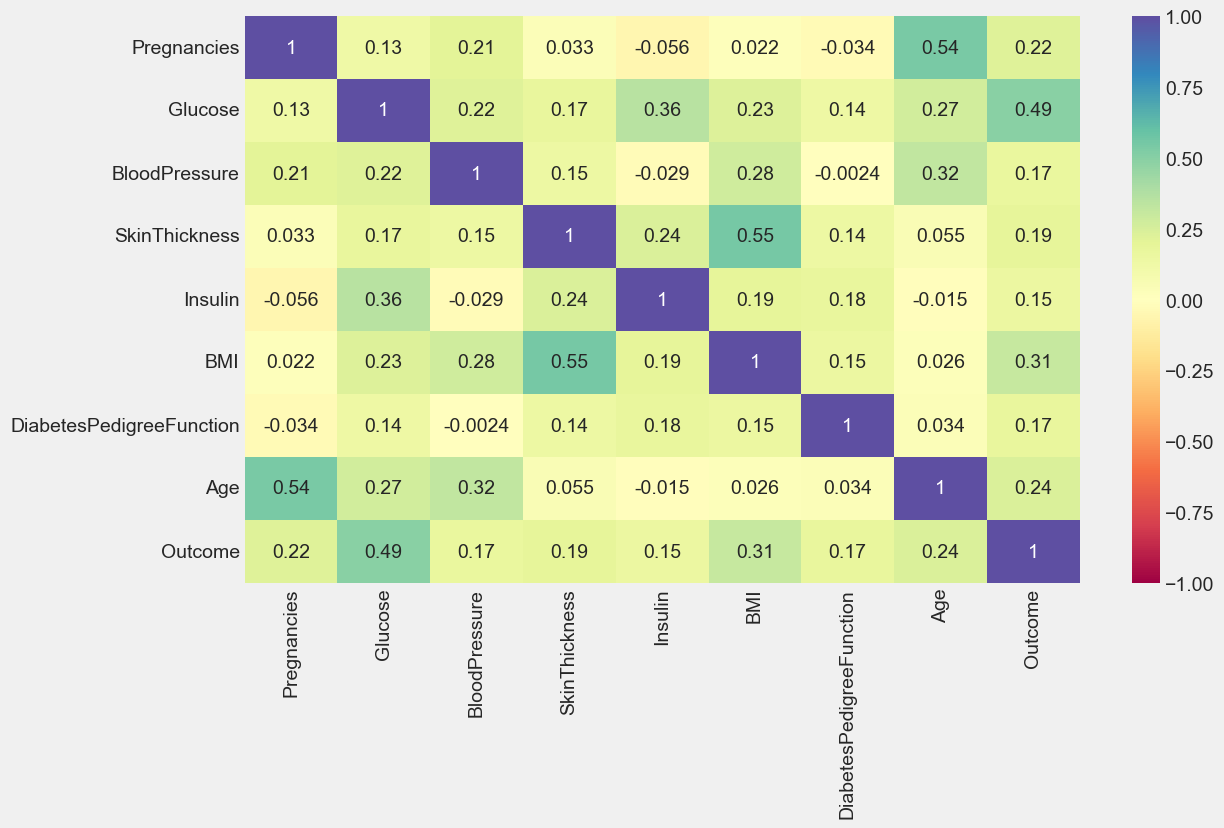

In [91]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), cmap='Spectral', vmax=+1, vmin=-1, annot=True)

**Observations**
Glucose and BMI are the strongest predictors of Outcome 

Lets create an app top display these charts 

In [92]:
!pip install streamlit

In [93]:
%%writefile eda.py
import streamlit as st
st.title("The EDA Page")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
st.set_option('deprecation.showPyplotGlobalUse', False)
plt.style.use('fivethirtyeight')

#load and clean the data
data=pd.read_csv("data/data.csv")
data.drop('Unnamed: 0', axis=1, inplace=True)
zerofiller=lambda x:x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, 0)
# encode the categorical outcome variable
df=data.copy()
d={"Yes":1, 'No':0}
df['Outcome']=df['Outcome'].map(d)
def view_data(data):
    st.write(df.head(10))
    st.pyplot()

def histograms(df):
    df.hist()
    plt.tight_layout()
    st.pyplot()
    
def barplot(data, feature):
    print("Bar plot of the variable ", feature)
    plt.figure(figsize=(10,7))
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
    st.pyplot()
    
def boxplot_histplot(data, feature, bins=None, figsize=(12,7)):
    print('Boxplot and Histplot for ', feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw = {"height_ratios":(0.25, 0.75)},
    figsize=figsize
    )
    sns.boxplot(data=data, x=feature, color='violet', ax=ax_box, showmeans=True)
    sns.histplotplot(data=data, x=feature, ax=ax_hist, bins=bins)   if bins else sns.histplot(data\
                            =data, x=feature, ax=ax_hist)  
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')
    st.pyplot()
    
st.sidebar.subheader("Choose the Plot")
plot=st.sidebar.selectbox('plot', ('Data', 'Histograms', 'Barchart', 'Boxplot_Scatterplot', 'Correlations'))

if st.sidebar.button('PLOT'):
    if plot=='Data':
        view_data(df)
    if plot=='Histograms':
        histograms(df)
    if plot=='Barchart':
        barplot(df, feature='Outcome')
    if plot=='Boxplot_Scatterplot':
        for col in df.select_dtypes(exclude='O').columns:
            boxplot_histplot(df, col)
    if plot=='Correlations':
        plt.figure(figsize=(12,7))
        sns.heatmap(df.corr(), cmap='Spectral', vmax=+1, vmin=-1, annot=True)
        st.pyplot()
        
        

Overwriting eda.py


# STEP 5 : Preprocessing
- Seperate the features and labels
- impute null
- encode categorial
- solve data imbalance
- train test split
- standard scaling

# DOUBT with STANDARD SCALLING

In [94]:
#Creating a function
def preprocess(data , label):
    #seperate the features and labels
    X = df.drop(columns = label)
    y = df[label]
    #solve data imbalance
    sm = SMOTE()
    X,y = sm.fit_resample(X,y)
    #train test split
    X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 42 , test_size = 0.3)
    return X_train , X_test , y_train , y_test

In [95]:
X_train , X_test , y_train , y_test = preprocess(df,'Outcome')

In [96]:
#Scale the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [97]:
print('X_train : ',X_train.shape)
print('X_test : ',X_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)

X_train :  (700, 8)
X_test :  (300, 8)
y_train :  (700,)
y_test :  (300,)


#### The Preprocessing is done. The data is ready for modelling

# Step 6 : Fit & Evaluate

In [98]:
def print_metrics(y_test , y_pred , model_name):
    print('Metrics for the model : ',model_name,'\n')
    print('Accuracy Score : ',accuracy_score(y_test , y_pred))
    print('Precision Score : ',precision_score(y_test , y_pred))
    print('Recall Score : ',recall_score(y_test , y_pred))
    print('F1 Score : ',f1_score(y_test , y_pred))
    print('ROC AUC Score : ',roc_auc_score(y_test , y_pred))
    print('Classification Report : \n\n',classification_report(y_test , y_pred))
    

In [99]:
def plot_metrics(clf , X_test , y_test , model_name):
    print('Metric for the model')
    plot_confusion_matrix(clf , X_test , y_test , display_labels= [0,1])
    print('')
    plot_roc_curve(clf , X_test , y_test)
    print('')
    plot_precision_recall_curve(clf , X_test , y_test)

In [100]:
#Fit and evaluate KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)
print_metrics(y_test , y_pred , 'KNN')

Metrics for the model :  KNN 

Accuracy Score :  0.7333333333333333
Precision Score :  0.7052023121387283
Recall Score :  0.8079470198675497
F1 Score :  0.7530864197530864
ROC AUC Score :  0.7328325703364594
Classification Report : 

               precision    recall  f1-score   support

           0       0.77      0.66      0.71       149
           1       0.71      0.81      0.75       151

    accuracy                           0.73       300
   macro avg       0.74      0.73      0.73       300
weighted avg       0.74      0.73      0.73       300



Metric for the model




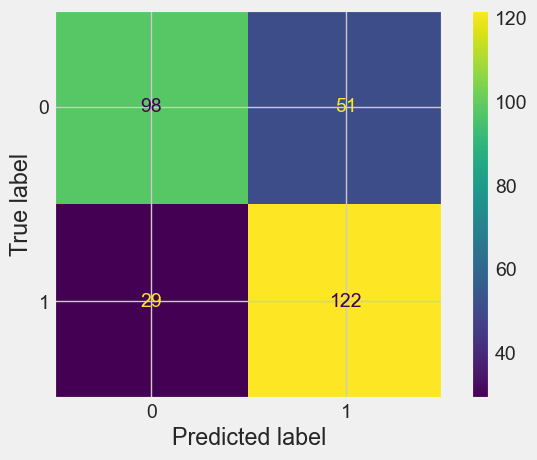

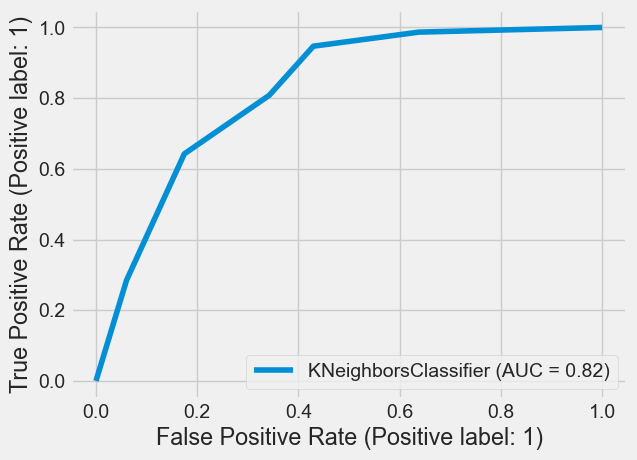

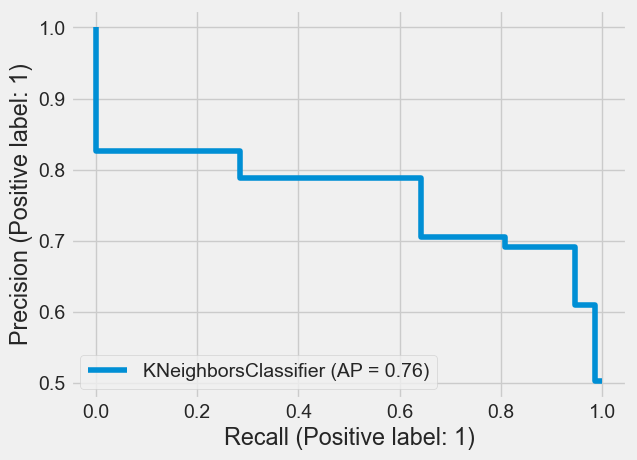

In [101]:
plot_metrics(knn , X_test , y_test,'KNN')

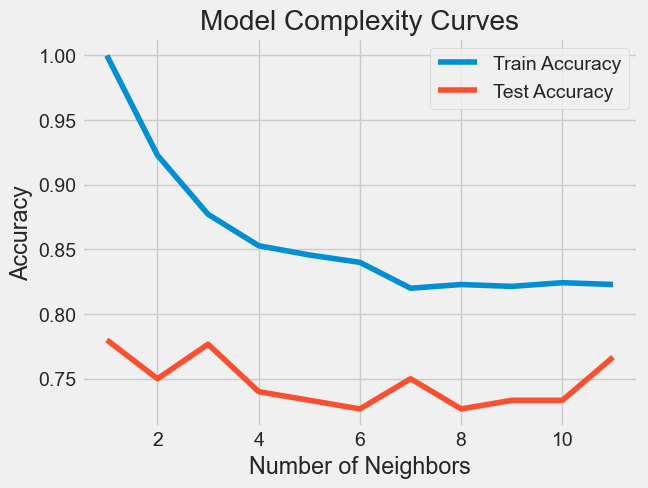

In [115]:
#Let's tune the hyperparameters

neighbors = np.arange(1,12)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train , y_train)
    train_accuracy[i] = knn.score(X_train , y_train)
    test_accuracy[i] = knn.score(X_test , y_test)

#plot the model complexity curve
plt.title('Model Complexity Curves')
plt.plot(neighbors , train_accuracy , label = 'Train Accuracy')
plt.plot(neighbors , test_accuracy , label = 'Test Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [116]:
tuple(enumerate(train_accuracy))

((0, 1.0),
 (1, 0.9228571428571428),
 (2, 0.8771428571428571),
 (3, 0.8528571428571429),
 (4, 0.8457142857142858),
 (5, 0.84),
 (6, 0.82),
 (7, 0.8228571428571428),
 (8, 0.8214285714285714),
 (9, 0.8242857142857143),
 (10, 0.8228571428571428))

In [117]:
tuple(enumerate(test_accuracy))

((0, 0.78),
 (1, 0.75),
 (2, 0.7766666666666666),
 (3, 0.74),
 (4, 0.7333333333333333),
 (5, 0.7266666666666667),
 (6, 0.75),
 (7, 0.7266666666666667),
 (8, 0.7333333333333333),
 (9, 0.7333333333333333),
 (10, 0.7666666666666667))

In [119]:
#refitting the model with neighnbor = 8

knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)
print_metrics(y_test , y_pred , 'KNN')

Metrics for the model :  KNN 

Accuracy Score :  0.7266666666666667
Precision Score :  0.7197452229299363
Recall Score :  0.7483443708609272
F1 Score :  0.7337662337662337
ROC AUC Score :  0.7265211787190542
Classification Report : 

               precision    recall  f1-score   support

           0       0.73      0.70      0.72       149
           1       0.72      0.75      0.73       151

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



In [128]:
#Lets fit all the models as once and decide the one to optimise

clfs = {'Logreg' : LogisticRegression(),
       'KNN' : KNeighborsClassifier(),
       'Naive Bayes' : GaussianNB(),
       'Decision Tree' : DecisionTreeClassifier(),
       'RandomForest' : RandomForestClassifier(),
       'AdaBoost' : AdaBoostClassifier(),
       'Gradient Boosting' : GradientBoostingClassifier(),
       'XGBoost' : XGBClassifier(),
       'SVM' : SVC()}

models_report = pd.DataFrame(columns = ['Model','Accuracy','Recall','Precision','F1'])

for clf , clf_name in list(zip(clfs.values() , clfs.keys())):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('Fitting the Model..........',clf_name)
    t=pd.Series({
        'Model' : clf_name,
        'Accuracy' : accuracy_score(y_test , y_pred),
        'Recall' :recall_score(y_test , y_pred),
        'Precision' : precision_score(y_test,y_pred),
        'F1' : f1_score(y_test , y_pred)
    })
    models_report = models_report.append(t,ignore_index = True)
    
models_report = models_report.sort_values(by = 'F1' , ascending = False)
models_report

Fitting the Model.......... Logreg
Fitting the Model.......... KNN
Fitting the Model.......... Naive Bayes
Fitting the Model.......... Decision Tree
Fitting the Model.......... RandomForest
Fitting the Model.......... AdaBoost
Fitting the Model.......... Gradient Boosting
Fitting the Model.......... XGBoost
Fitting the Model.......... SVM


,Model,Accuracy,Recall,Precision,F1
4,RandomForest,0.806667,0.860927,0.778443,0.817610
8,SVM,0.793333,0.847682,0.766467,0.805031
6,Gradient Boosting,0.770000,0.814570,0.750000,0.780952
7,XGBoost,0.760000,0.807947,0.739394,0.772152
3,Decision Tree,0.766667,0.781457,0.761290,0.771242
1,KNN,0.733333,0.807947,0.705202,0.753086
5,AdaBoost,0.740000,0.781457,0.723926,0.751592
2,Naive Bayes,0.746667,0.682119,0.786260,0.730496
0,Logreg,0.733333,0.708609,0.748252,0.727891


#### Usually RandomForest , SVM will top 


In [162]:
rfc = RandomForestClassifier()
rfc.fit(X_train , y_train)
y_pred = rfc.predict(X_test)

print_metrics(y_test , y_pred , 'RFC')

Metrics for the model :  RFC 

Accuracy Score :  0.8
Precision Score :  0.7757575757575758
Recall Score :  0.847682119205298
F1 Score :  0.810126582278481
ROC AUC Score :  0.7996799857771456
Classification Report : 

               precision    recall  f1-score   support

           0       0.83      0.75      0.79       149
           1       0.78      0.85      0.81       151

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



In [166]:
import time
a = time.time()
tuned_paramaters = {'criterion': ['entropy', 'gini'],
                     'n_estimators': [100,150,200],
                     'max_depth': [1,2,3,4,5],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split':range(2,10,2),
                     'min_samples_leaf': range(1,5,1)}
n_folds = 3
cv = GridSearchCV(estimator = rfc , param_grid = tuned_paramaters , cv = n_folds , n_jobs = -1 , return_train_score = False , verbose = 3 , scoring = 'f1')
cv.fit(X_train , y_train)
b = time.time()
print('Time taken is : ',b-a)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits
Time taken is :  41.399916648864746


In [167]:
cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=3, min_samples_split=8,
                       n_estimators=150)

In [168]:
rfc_tuned = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=3, min_samples_split=8,
                       n_estimators=150)

rfc_tuned.fit(X_train , y_train)
y_pred = rfc_tuned.predict(X_test)
print_metrics(y_test , y_pred , 'RFC Tuned')

Metrics for the model :  RFC Tuned 

Accuracy Score :  0.7533333333333333
Precision Score :  0.7361963190184049
Recall Score :  0.7947019867549668
F1 Score :  0.7643312101910829
ROC AUC Score :  0.7530556913640607
Classification Report : 

               precision    recall  f1-score   support

           0       0.77      0.71      0.74       149
           1       0.74      0.79      0.76       151

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



# Step 8: Interpretation

In [170]:
!pip install shap

     -------------------------------------- 435.6/435.6 kB 3.4 MB/s eta 0:00:00


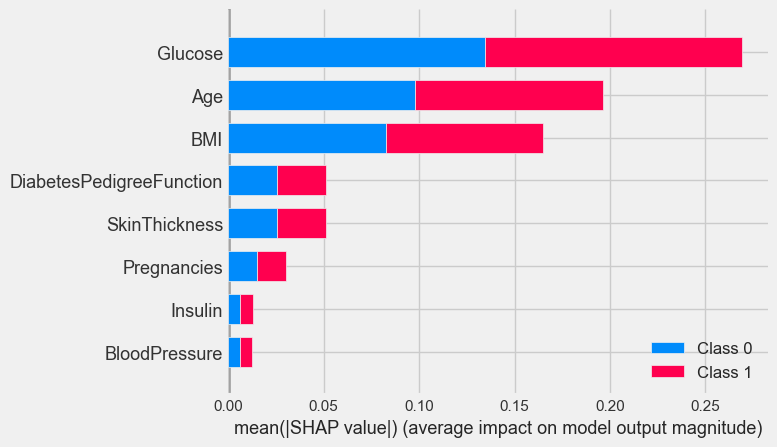

In [174]:
import shap
value = shap.TreeExplainer(rfc_tuned).shap_values(X_test)
X = df.drop(columns = 'Outcome')
shap.summary_plot(value , X_train , plot_type = 'bar' , feature_names = X.columns)

###  Create pipeline for deployment

In [176]:
from sklearn.pipeline import Pipeline
sc = StandardScaler()
rfc_tuned = rfc_tuned
X_train , X_test , y_train , y_test = preprocess(df,'Outcome')
steps = [('Scaling',sc) , ('rfc tuned',rfc_tuned)]
pipeline = Pipeline(steps)
pipeline.fit(X_train , y_train)
y_pred = pipeline.predict(X_test)
print_metrics(y_test , y_pred,'Pipeline')

Metrics for the model :  Pipeline 

Accuracy Score :  0.7666666666666667
Precision Score :  0.7262569832402235
Recall Score :  0.8609271523178808
F1 Score :  0.7878787878787878
ROC AUC Score :  0.766034045957598
Classification Report : 

               precision    recall  f1-score   support

           0       0.83      0.67      0.74       149
           1       0.73      0.86      0.79       151

    accuracy                           0.77       300
   macro avg       0.78      0.77      0.76       300
weighted avg       0.78      0.77      0.76       300



In [177]:
#pickle the pipeline

import pickle
model = open('rfc.pickle' , 'wb') #file handling
pickle.dump(pipeline,model)
model.close()

### *Deployment of the pickled model*

In [198]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle
st.title('Medical Diagnostic Web App 🩻')

#step 1
model = open('rfc.pickle' , 'rb')
clf = pickle.load(model)
model.close()

#step2 : Creating Widgets

pregs = st.number_input('Pregnancies',1,20,step = 1)
glucose = st.slider('Glucose' , 40.0,200.0,40.0)
bp = st.slider('BloodPressure',24,122,24)
skin = st.slider('SkinThickness',7,99,7)
insulin = st.slider('Insulin',18.0,850.0,18.0)
bmi = st.slider('BMI',18.0,67.0,18.0)
dfp = st.slider('DiabetesPedigreeFunction',0.05,2.5,0.05)
age = st.slider('Age',21,81,21)

#step 3 : converting user input into model input

data = {'Pregnancies' : pregs,
        'Glucose' : glucose,
        'BloodPressure' : bp,
        'SkinThickness' : skin,
        'Insulin' : insulin,
       'BMI' : bmi,
        'DiabetesPedigreeFunction' : dfp,
        'Age' : age}
input_data = pd.DataFrame([data])

#step4 : Get Predictions
preds = clf.predict(input_data)[0]
if st.button('Predict'):
    if preds == 1:
        st.error('The Person has Diabetes')
    if preds == 0:
        st.success('The Person is Diabetes Free')

Overwriting app.py


In [196]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [181]:
df[df.columns[:]].agg(['min','max'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
min,0,44,24,7,14.0,18.2,0.078,21,0
max,17,199,122,99,846.0,67.1,2.420,81,1
